<a href="https://colab.research.google.com/github/mdaamir6870/A-Review-of-Sentiment-Analysis-Techniques-for-Uber-and-Ola/blob/main/Deep_Learning_OlaUber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# # Importing All required library

In [2]:
# Importing All required library
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from prettytable import PrettyTable


In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Working with ola dataset

In [12]:
# Load your dataset into a DataFrame
data = pd.read_csv("/content/Ola_Category_3000.csv",encoding='ISO-8859-1') # Replace 'your_data.csv' with your file
data.head()

# Preprocessing text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply preprocessing to the 'Tweets' column
data['Tweets'] = data['Tweets'].apply(preprocess_text)



In [13]:
data['Tweets']

0       thank sending u crns showing u interest olasel...
1       averageintel pokemongoapp worry autoconnect lu...
2                            kabaliday httpstcojdqfl284qw
3                            suchetadalal let u know help
4                            suchetadalal moneylifef done
                              ...                        
2994    akashra66 leak olarestrooms nopressure httpstc...
2995    mahalakshmi3117 wow look like thereâs leak ne...
2996    arijit10sinha nopressure olarestrooms httpstco...
2997    thank laughing u olarestrooms yet bit facilita...
2998    thank laughing u olarestrooms yet bit facilita...
Name: Tweets, Length: 2999, dtype: object

In [14]:
data['Category'].describe()

count    2999.000000
mean        0.701901
std         0.457500
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Category, dtype: float64

In [15]:
# we just grouped the datset based on the 'Category' feature to visualize the counts of positive and negative values

f = data.groupby("Category")
f.count()

,Tweets
Category,
0,894
1,2105


In [16]:
# Split the dataset into features (X) and target (y)
X_ola= data['Tweets']
y_ola = data['Category']

# Convert text data into TF-IDF vectors
tfidf = TfidfVectorizer()
X_ola_tfidf = tfidf.fit_transform(X_ola)

In [17]:
# Count the class before applying SMOTE
class_before_Bal_ola = y_ola.value_counts()
class_before_Bal_ola

1    2105
0     894
Name: Category, dtype: int64

In [18]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_ola_balanced, y_ola_balanced = smote.fit_resample(X_ola_tfidf, y_ola)

In [19]:
# Count the class distribution after applying SMOTE
class_after_Bal_ola = y_ola_balanced.value_counts()
class_after_Bal_ola

1    2105
0    2105
Name: Category, dtype: int64

In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow import keras

# Assuming X_ola_balanced contains your features and y_ola_balanced contains your labels

# Split the data into training and testing sets for Ola dataset
X_ola_train, X_ola_test, y_ola_train, y_ola_test = train_test_split(X_ola_balanced, y_ola_balanced, test_size=0.2, random_state=42)

# Encode categorical labels for Ola dataset
le_ola = LabelEncoder()
y_ola_train_encoded = le_ola.fit_transform(y_ola_train)
y_ola_test_encoded = le_ola.transform(y_ola_test)

# Convert scipy sparse matrices to numpy arrays for Ola dataset
X_ola_train_np = X_ola_train.toarray()
X_ola_test_np = X_ola_test.toarray()

# Define and train Feedforward Neural Network (FNN) for Ola dataset
model_fnn_ola = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_ola_train_np.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(le_ola.classes_), activation='softmax')
])
model_fnn_ola.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_fnn_ola.fit(X_ola_train_np, y_ola_train_encoded, epochs=5, batch_size=32, validation_split=0.2)
test_loss_fnn_ola, test_acc_fnn_ola = model_fnn_ola.evaluate(X_ola_test_np, y_ola_test_encoded)
print(f'Test Accuracy (FNN): {test_acc_fnn_ola}')  # Accuracy for FNN

# Define and train Convolutional Neural Network (CNN) for Ola dataset
model_cnn_ola = keras.Sequential([
    keras.layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_ola_train_np.shape[1], 1)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(le_ola.classes_), activation='softmax')
])
model_cnn_ola.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cnn_ola.fit(X_ola_train_np.reshape(X_ola_train_np.shape[0], X_ola_train_np.shape[1], 1), y_ola_train_encoded, epochs=5, batch_size=32, validation_split=0.2)
test_loss_cnn_ola, test_acc_cnn_ola = model_cnn_ola.evaluate(X_ola_test_np.reshape(X_ola_test_np.shape[0], X_ola_test_np.shape[1], 1), y_ola_test_encoded)
print(f'Test Accuracy (CNN): {test_acc_cnn_ola}')  # Accuracy for CNN


Epoch 1/5
85/85 [==============================] - 5s 38ms/step - loss: 0.6174 - accuracy: 0.7190 - val_loss: 0.3798 - val_accuracy: 0.9095
Epoch 2/5
85/85 [==============================] - 3s 32ms/step - loss: 0.1968 - accuracy: 0.9354 - val_loss: 0.1962 - val_accuracy: 0.9288
Epoch 3/5
85/85 [==============================] - 3s 36ms/step - loss: 0.0416 - accuracy: 0.9881 - val_loss: 0.1928 - val_accuracy: 0.9318
Epoch 4/5
85/85 [==============================] - 2s 20ms/step - loss: 0.0116 - accuracy: 0.9985 - val_loss: 0.2069 - val_accuracy: 0.9362
Epoch 5/5
27/27 [==============================] - 0s 5ms/step - loss: 0.2212 - accuracy: 0.9216
Test Accuracy (FNN): 0.9216151833534241
Epoch 1/5
85/85 [==============================] - 118s 1s/step - loss: 0.4291 - accuracy: 0.7918 - val_loss: 0.3629 - val_accuracy: 0.8531
Epoch 2/5
85/85 [==============================] - 115s 1s/step - loss: 0.0730 - accuracy: 0.9796 - val_loss: 0.2533 - val_accuracy: 0.9095
Epoch 3/5
85/85 [======

# Same Process for Uber Dataset

In [23]:

# Load your dataset into a DataFrame
data_uber = pd.read_csv('/content/Uber_Category_3000.csv',encoding='ISO-8859-1') # Replace 'your_data.csv' with your file
data_uber.head()

# Preprocessing text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply preprocessing to the 'Tweets' column
data_uber['Tweets'] = data_uber['Tweets'].apply(preprocess_text)



In [24]:
# we just grouped the datset based on the 'Category' feature to visualize the counts of positive and negative values

f = data_uber.groupby("Category")
f.count()

,Tweets
Category,
0,455
1,2544


In [25]:
# Split the dataset into features (X) and target (y)
X_uber = data_uber['Tweets']
y_uber = data_uber['Category']

# Convert text data into TF-IDF vectors
tfidf = TfidfVectorizer()
X_uber_tfidf = tfidf.fit_transform(X_uber)

In [26]:
# Count the class before applying SMOTE
class_before_Bal_uber = y_uber.value_counts()
class_before_Bal_uber

1    2544
0     455
Name: Category, dtype: int64

In [27]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_uber_balanced, y_uber_balanced = smote.fit_resample(X_uber_tfidf, y_uber)

In [28]:
# Count the class distribution after applying SMOTE
class_after_Bal_uber = y_uber_balanced.value_counts()
class_after_Bal_uber

1    2544
0    2544
Name: Category, dtype: int64

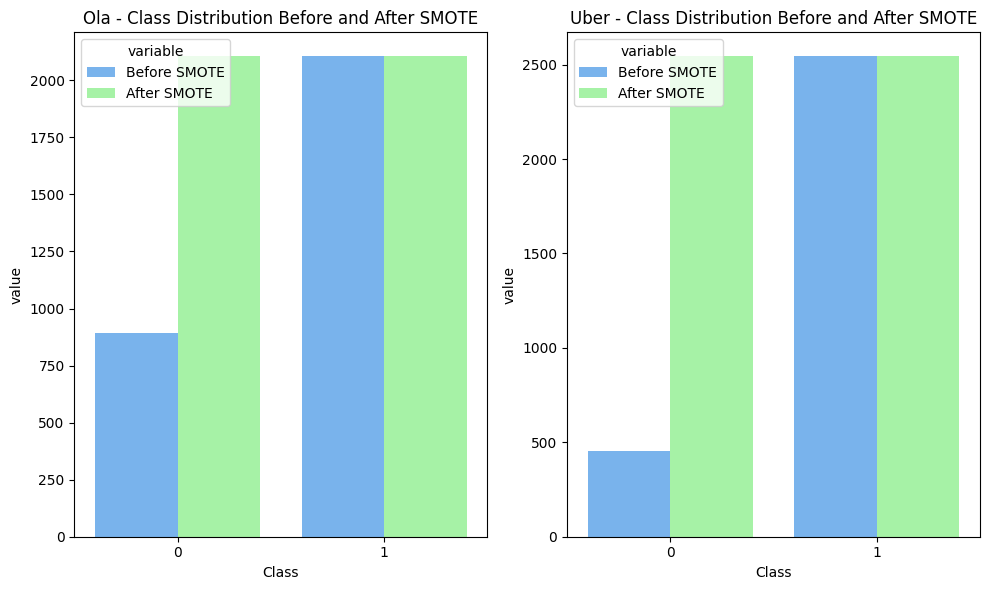

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming class_before_Bal, class_after_Bal, class_before_Bal_uber, and class_after_Bal_uber are Pandas Series

# Set up the figure
plt.figure(figsize=(10, 6))

# Combine class_before_Bal and class_after_Bal for Ola
ola_data = pd.DataFrame({
    'Class': class_before_Bal_ola.index,
    'Before SMOTE': class_before_Bal_ola.values,
    'After SMOTE': class_after_Bal_ola.values
})

# Combine class_before_Bal_uber and class_after_Bal_uber for Uber
uber_data = pd.DataFrame({
    'Class': class_before_Bal_uber.index,
    'Before SMOTE': class_before_Bal_uber.values,
    'After SMOTE': class_after_Bal_uber.values
})

# Ola - Class Distribution Before and After SMOTE (Grouped Bar Plot)
plt.subplot(1, 2, 1)
sns.barplot(x='Class', y='value', hue='variable', data=pd.melt(ola_data, id_vars='Class'), palette=['#66b3ff', '#99ff99'])
plt.title('Ola - Class Distribution Before and After SMOTE')

# Uber - Class Distribution Before and After SMOTE (Grouped Bar Plot)
plt.subplot(1, 2, 2)
sns.barplot(x='Class', y='value', hue='variable', data=pd.melt(uber_data, id_vars='Class'), palette=['#66b3ff', '#99ff99'])
plt.title('Uber - Class Distribution Before and After SMOTE')

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot as an image or display it
# plt.savefig('grouped_bar_class_distribution.png')
plt.show()


In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_uber_balanced, y_uber_balanced, test_size=0.2, random_state=42)




In [31]:
# Encode categorical labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Convert scipy sparse matrices to numpy arrays
X_train_np = X_train.toarray()
X_test_np = X_test.toarray()

# Define and train Feedforward Neural Network (FNN)
model_fnn = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_np.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(le.classes_), activation='softmax')
])
model_fnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_fnn.fit(X_train_np, y_train_encoded, epochs=5, batch_size=32, validation_split=0.2)
test_loss_fnn, test_acc_fnn = model_fnn.evaluate(X_test_np, y_test_encoded)
print(f'Test Accuracy (FNN): {test_acc_fnn}')  # Accuracy for FNN

# Define and train Convolutional Neural Network (CNN)
model_cnn = keras.Sequential([
    keras.layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_np.shape[1], 1)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(le.classes_), activation='softmax')
])
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train_np, y_train_encoded, epochs=5, batch_size=32, validation_split=0.2)
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(X_test_np, y_test_encoded)
print(f'Test Accuracy (CNN): {test_acc_cnn}')  # Accuracy for CNN

# Print test accuracies for all models
print("\nTest Accuracies:")
print(f"FNN: {test_acc_fnn}")
print(f"CNN: {test_acc_cnn}")



Epoch 1/5
102/102 [==============================] - 2s 9ms/step - loss: 0.4451 - accuracy: 0.8400 - val_loss: 0.1364 - val_accuracy: 0.9681
Epoch 2/5
102/102 [==============================] - 1s 8ms/step - loss: 0.0925 - accuracy: 0.9721 - val_loss: 0.0703 - val_accuracy: 0.9742
Epoch 3/5
102/102 [==============================] - 1s 12ms/step - loss: 0.0350 - accuracy: 0.9899 - val_loss: 0.0450 - val_accuracy: 0.9816
Epoch 4/5
102/102 [==============================] - 1s 12ms/step - loss: 0.0177 - accuracy: 0.9957 - val_loss: 0.0387 - val_accuracy: 0.9828
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.0369 - accuracy: 0.9882
Test Accuracy (FNN): 0.9882121682167053
Epoch 1/5
102/102 [==============================] - 28s 261ms/step - loss: 0.2518 - accuracy: 0.9060 - val_loss: 0.1058 - val_accuracy: 0.9668
Epoch 2/5
102/102 [==============================] - 23s 223ms/step - loss: 0.0538 - accuracy: 0.9825 - val_loss: 0.0818 - val_accuracy: 0.9717
Epoch 3/5